# Visualising an image dataset using Facets Dive

This Notebook serves as a simple example for how to visualise an image dataset with associated tabular data. For this example we just generate some example tabular data from the images themselves.

In [3]:
!pip install scikit-image

     |████████████████████████████████| 12.2MB 7.6MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 7.4MB/s eta 0:00:01
     |████████████████████████████████| 153kB 8.4MB/s eta 0:00:01
     |████████████████████████████████| 3.3MB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 8.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from skimage import io

## Download the Fashion-MNIST dataset

In [5]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git fmnist

Cloning into 'fmnist'...
remote: Enumerating objects: 692, done.
remote: Total 692 (delta 0), reused 0 (delta 0), pack-reused 692
Receiving objects: 100% (692/692), 105.21 MiB | 4.55 MiB/s, done.
Resolving deltas: 100% (399/399), done.


In [6]:
import sys
sys.path.append('fmnist/utils')
from mnist_reader import load_mnist

X_train, y_train = load_mnist('fmnist/data/fashion', kind='train')
X_test, y_test = load_mnist('fmnist/data/fashion', kind='t10k')

In [7]:
X_train = X_train[0:400]
y_train = y_train[0:400]

In [8]:
label_names = {
    0: 't-shirt/top',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'angle_boot'
}

## Generate some artificial meta-data for each image

In [9]:
# store the indices of each image as IDs
im_ids = range(X_train.shape[0])

# get the brightness of each image
im_brightness = np.mean(X_train, axis=1)

# get the number of non-zero pixels per image
non_zeros = np.sum(X_train > 0, axis=1)

class_name = [label_names[y] for y in y_train]

# output to JSON file

df = pd.DataFrame({'id': im_ids, 'class_id': y_train, 'class_name': class_name, 'brightness': im_brightness, 'non-zeros': non_zeros})
jsonstr = df.to_json(orient='records')

with open('fmnist_data.json', 'w') as f:
    f.write(jsonstr)

In [16]:
df.to_csv('fmnist.csv', index=None)


## Create sprite atlas

We use Bazel to generate a "sprite atlas", which is a mosaic of all the small images.

Since we already have all the images in a Numpy array, we can generate our own sprite atlas.

### Manually create sprite atlas (i.e. mosaic)

In [10]:
# reshape image data from rows into square images
im_w = im_h = 28
num_images = X_train.shape[0]
X = np.reshape(X_train, (num_images, im_h, im_w))

# calculate how many rows and columns we need (round up)
cols = int(np.ceil(np.sqrt(X_train.shape[0])))
rows = int(np.ceil(X_train.shape[0] * 1. / cols))

# copy image data into mosaic
mosaic = np.zeros((rows * im_h, cols * im_w), dtype=np.uint8)

for row in range(rows):
    for col in range(cols):
        im_index = col * rows + row
        if im_index < num_images:
            mosaic[col * im_h:(col+1) * im_h, row * im_w:(row+1) * im_w] = X[im_index, :, :]

In [11]:
# write mosaic image to disk
io.imsave('sprite_atlas.png', mosaic)

sneaker


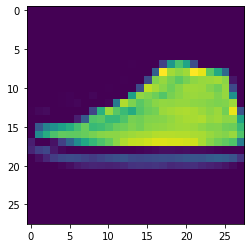

In [12]:
jj = 41
plt.imshow(X[jj, :, :])
print(label_names[y_train[jj]])

## Visualise using Facets Dive

In [13]:
with open('fmnist_data.json', 'r') as f:
    jsonstr = f.read()

In [14]:
# Display the Dive visualization for this data
from IPython.core.display import display, HTML

sprite_size = 28

# Create Facets template  
HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
        <facets-dive sprite-image-width="{sprite_size}" sprite-image-height="{sprite_size}" id="elem" height="600" atlas-url="sprite_atlas.png"></facets-dive>
        <script>
          document.querySelector("#elem").data = {jsonstr};
        </script>"""

# Load the json dataset and the sprite_size into the template
html = HTML_TEMPLATE.format(jsonstr=jsonstr, sprite_size=sprite_size)

# Display the template
display(HTML(html))